In [ ]:
import tensorflow as tf
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split 

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [ ]:
data=pd.read_csv('--path-to-data/stead_earthquake.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.shape

(1058954, 35)

Adding a column for Dataframe for classification (0-low,1-moderate,2-high)

In [ ]:
data["Class"]="0"

In [ ]:
data.shape

(1058954, 36)

 **Classifying based on Source_magnitude**

---



In [ ]:
def add_column(x):
  if x<2.5:
    return 0
  elif x>4.5:
    return 2
  else:
    return 1

In [ ]:
data["Class"]=data["source_magnitude"].apply(add_column)

In [ ]:
data.head()

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,s_arrival_sample,s_status,s_weight,source_id,source_origin_time,source_origin_uncertainty_sec,source_latitude,source_longitude,source_error_sec,source_gap_deg,source_horizontal_uncertainty_km,source_depth_km,source_depth_uncertainty_km,source_magnitude,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name,Class
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.08,1894.0,manual,0.5,8556349,2006-07-23 15:58:50.88,0.47,33.7496,-117.4938,1.1119,107.466,4.6403,0.45,NaN,3.6,ml,NaN,NaN,0.92,102.09,159.3,"[56.79999923706055, 55.400001525878906, 47.400...",2896.0,2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV,1
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.88,1763.0,manual,0.5,8860238,2006-11-03 15:56:42.73,0.24,32.7077,-116.0446,0.8990,37.593,2.9542,9.20,NaN,4.3,mb,NaN,NaN,0.91,101.34,281.7,"[65.0, 65.5, 61.400001525878906]",5508.0,2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV,1
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.26,1678.0,manual,0.5,8940123,2006-11-03 16:12:12.44,0.27,32.7253,-116.0348,0.8127,48.096,3.0397,12.66,NaN,3.6,ml,NaN,NaN,0.92,101.87,280.5,"[37.20000076293945, 42.0, 38.599998474121094]",3114.0,2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV,1
3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,17.28,2086.0,manual,0.5,9443190,2006-11-14 13:32:14.26,0.25,32.7063,-116.0241,0.9173,43.783,2.6112,11.50,NaN,3.8,ml,NaN,NaN,0.93,103.26,281.6,"[54.099998474121094, 54.900001525878906, 45.5]",3152.0,2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV,1
4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,18.14,1897.0,manual,0.5,9443449,2006-11-27 10:46:29.92,0.67,31.9679,-117.1944,1.0362,182.145,5.6607,7.26,NaN,3.6,ml,NaN,NaN,0.92,102.48,4.7,"[58.20000076293945, 56.20000076293945, 53.7999...",3134.0,2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV,1


**Dropping less important columns**

In [ ]:
data=data.drop(['network_code','receiver_code','snr_db','trace_start_time','source_origin_time','receiver_type','p_status','s_status','source_depth_uncertainty_km','source_magnitude_author','source_mechanism_strike_dip_rake','trace_category','trace_name','source_magnitude_type','source_id'],axis=1)

**Droping the columns having NaN**

In [ ]:
data=data.drop(['source_origin_uncertainty_sec','source_horizontal_uncertainty_km'],axis=1)
data=data.drop(['source_error_sec','source_gap_deg'],axis=1)

In [ ]:
data.columns

Index(['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m',
       'p_arrival_sample', 'p_weight', 'p_travel_sec', 's_arrival_sample',
       's_weight', 'source_latitude', 'source_longitude', 'source_depth_km',
       'source_magnitude', 'source_distance_deg', 'source_distance_km',
       'back_azimuth_deg', 'coda_end_sample', 'Class'],
      dtype='object')

In [ ]:
data=data.drop(['p_arrival_sample','p_weight','p_travel_sec','s_arrival_sample','s_weight','source_distance_deg','back_azimuth_deg','coda_end_sample'],axis=1)

In [ ]:
data.columns

Index(['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m',
       'source_latitude', 'source_longitude', 'source_depth_km',
       'source_magnitude', 'source_distance_km', 'Class'],
      dtype='object')

Checking the correlation of features with Magnitude


**Checking the correlation between the features:**

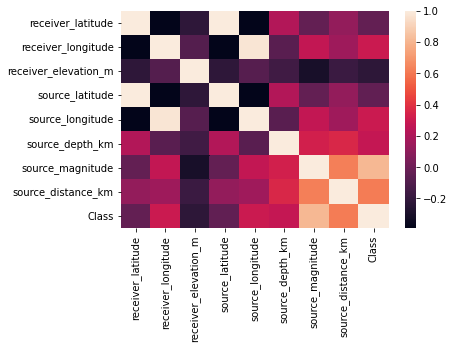

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)


**Visualization of the data **/ takes lot of time: dont run

In [ ]:
# Visualize data with Seaborn
# g=sns.pairplot(data, hue="Class", height= 2.5)

**Dividing features into lables and features:**

In [ ]:
cols = data.columns
features = cols[0:8]
labels = cols[8]
print(features)
print(labels)

Index(['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m',
       'source_latitude', 'source_longitude', 'source_depth_km',
       'source_magnitude', 'source_distance_km'],
      dtype='object')
Class


This features every column except class, lables=class

Normalisation of the data is required to bring all the features into a range.Normalization is not required for every dataset, you have to sift through it and make sure if your data requires it and only then continue to incorporate this step in your procedure. Also, you should apply Normalization if you are not very sure if the data distribution is Gaussian/ Normal/ bell-curve in nature. Normalization will help in reducing the impact of non-gaussian attributes on your model. 
ref:https://towardsdatascience.com/clearly-explained-what-why-and-how-of-feature-scaling-normalization-standardization-e9207042d971

**Scaling:**

In [ ]:
#Well conditioned data will have zero mean and equal variance
#We get this automattically when we calculate the Z Scores for the data

data_norm = pd.DataFrame(data)

for feature in features:
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

#Show that should now have zero mean
print("Averages")
print(data.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data.std(),2))

Averages
receiver_latitude      -9.116235e-12
receiver_longitude      1.841306e-12
receiver_elevation_m    1.766754e-13
source_latitude        -1.272591e-13
source_longitude       -6.374304e-14
source_depth_km        -1.589547e-13
source_magnitude       -9.559065e-13
source_distance_km      3.686157e-14
Class                   1.836218e-01
dtype: float64

 Deviations
receiver_latitude       1.000000
receiver_longitude      1.000000
receiver_elevation_m    1.000000
source_latitude         1.000000
source_longitude        1.000000
source_depth_km         1.000000
source_magnitude        1.000000
source_distance_km      1.000000
Class                   0.163401
dtype: float64


**Shuffling :**

In [ ]:
#Shuffle The data
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]

In [ ]:
X = X.fillna(X.mean())   

checking for nan values

In [ ]:
X.isna().sum() 

receiver_latitude       0
receiver_longitude      0
receiver_elevation_m    0
source_latitude         0
source_longitude        0
source_depth_km         0
source_magnitude        0
source_distance_km      0
dtype: int64

In [ ]:
data.shape

(1058954, 9)

**Splitting the data into train validation and test in the ratio 70:20:10**

In [ ]:
# Generate Training and Validation Sets
X_train, X_validation, y_train, y_validation = train_test_split(X,y, test_size=.3)
# Generate Validation and the test set
X_validation, X_test, y_validation, y_test = train_test_split(X_validation,y_validation, test_size=.33)

#output_class=data['Class']
#output_source_magnitude=data['source_magnitude']
#data=data.drop(['source_magnitude'],axis=1)

train_magnitude=X_train['source_magnitude']
validation_magnitude=X_validation['source_magnitude']
test_magnitude=X_test['source_magnitude']

X_train=X_train.drop(['source_magnitude'],axis=1)
X_validation=X_validation.drop(['source_magnitude'],axis=1)
X_test=X_test.drop(['source_magnitude'],axis=1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)
print(X_test.shape, y_test.shape) 

(741267, 7) (741267,)
(212850, 7) (212850,)
(104837, 7) (104837,)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import accuracy
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping

**Neural Network Basic model:**

In [ ]:
def model(optimizer, neurons, activation):
    model = Sequential()
    #input to the hidden layer
    model.add(Dense(neurons, activation=activation, input_shape=(7,)))
    #hidden to output layer
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='squared_hinge', metrics=['accuracy'], optimizer=optimizer)
    return model

Loss Functions:
Binary cross entropy, categorical cross entropy , sqared hinge loss are tried . Squared hinge loss is giving the optimum results.

Activation Functions;
Output layer checked with Relu, Softmax and sigmoid. Soft max is working the worst where as the sigmoid activation function is working the best.

In [ ]:
y_validation.shape
print(y_validation.unique())

[0 1 2]


In [ ]:
m = model(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 11, 'relu' )
#m = model("SGD", 11, 'sigmoid' )
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                88        
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


**Fitting the model:**

In [ ]:
m.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_validation, y_validation))

Train on 741267 samples, validate on 212850 samples
Epoch 1/4
739616/741267 [============================>.] - ETA: 0s - loss: 0.9195 - acc: 0.9028

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


741267/741267 [==============================] - 20s 27us/sample - loss: 0.9194 - acc: 0.9028 - val_loss: 0.9136 - val_acc: 0.9075
Epoch 2/4
741267/741267 [==============================] - 20s 27us/sample - loss: 0.9143 - acc: 0.9091 - val_loss: 0.9127 - val_acc: 0.9091
Epoch 3/4
741267/741267 [==============================] - 20s 27us/sample - loss: 0.9139 - acc: 0.9095 - val_loss: 0.9122 - val_acc: 0.9091
Epoch 4/4
741267/741267 [==============================] - 20s 26us/sample - loss: 0.9134 - acc: 0.9103 - val_loss: 0.9120 - val_acc: 0.9108


**Tuning hyper parameters:**
**1) tune number of neurons.** 

1.   List item
2.   List item



In [ ]:
for i in range(8,13):
  m = model(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), i, 'relu' )
  m.fit(X_train, y_train, epochs=4, batch_size=32, verbose=0, validation_data=(X_validation, y_validation))
  [test_loss, test_acc] = m.evaluate(X_test, y_test)
  print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Evaluation result on Test Data : Loss = 0.9122469998557198, accuracy = 0.9103561043739319
Evaluation result on Test Data : Loss = 0.9133315468461692, accuracy = 0.9140189290046692
Evaluation result on Test Data : Loss = 0.9119260019894766, accuracy = 0.9104991555213928
Evaluation result on Test Data : Loss = 0.9118249063796016, accuracy = 0.9120539426803589
Evaluation result on Test Data : Loss = 0.9109725676790296, accuracy = 0.9105754494667053


In [ ]:
print(m.history.params)

{'batch_size': 32, 'epochs': 4, 'steps': None, 'samples': 741267, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


Following section contains the optimizer function adam  with the different hidden layers from 4 to 13.

In [ ]:
neuron_acc = []
neuron_acc_validation = []
neuron_acc_test =[]
optimizers=["SGD","Adam","Adagrad"]
for i in range(8,16):
    m_= model("Adam",i,'relu')
    m_.fit(X_train, y_train, epochs=6, batch_size=32, verbose=0, validation_data=(X_validation, y_validation))

    m_.history.history['acc'].sort() 
    m_.history.history['val_acc'].sort() 
        
    best_acc = round(m_.history.history['acc'][-1],4)
    best_acc_val = round(m_.history.history['val_acc'][-1],4)

    neuron_acc.append(best_acc)
    neuron_acc_validation.append(best_acc_val)

    [test_loss, test_acc] = m_.evaluate(X_test, y_test)
    print("for  ",i,"  Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

    neuron_acc_test.append(test_acc)
    

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


for   8   Evaluation result on Test Data : Loss = 0.9149289118122108, accuracy = 0.9102225303649902
for   9   Evaluation result on Test Data : Loss = 0.9099761023616438, accuracy = 0.9135515093803406
for   10   Evaluation result on Test Data : Loss = 0.9101151721755891, accuracy = 0.9123782515525818
for   11   Evaluation result on Test Data : Loss = 0.9120035006528144, accuracy = 0.9138758182525635
for   12   Evaluation result on Test Data : Loss = 0.9107646589617482, accuracy = 0.9111000895500183
for   13   Evaluation result on Test Data : Loss = 0.909475409819824, accuracy = 0.9126167297363281
for   14   Evaluation result on Test Data : Loss = 0.9123724852198017, accuracy = 0.9102797508239746
for   15   Evaluation result on Test Data : Loss = 0.9105274142923078, accuracy = 0.9119776487350464


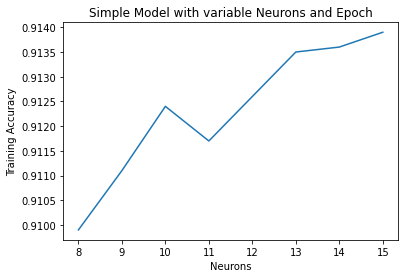

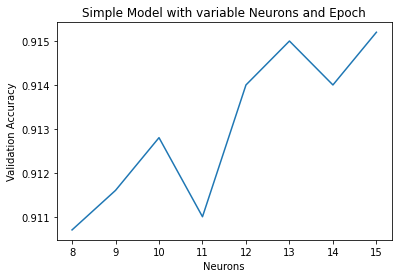

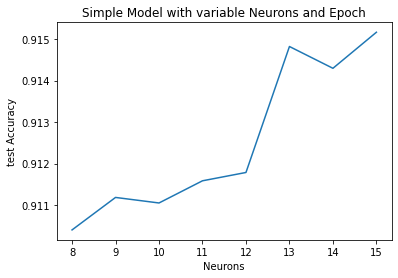

In [ ]:
neurons=[8,9,10,11,12,13,14,15]
plt.plot(neurons, neuron_acc)
plt.xlabel('Neurons')
plt.ylabel('Training Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

plt.plot(neurons, neuron_acc_validation)
plt.xlabel('Neurons')
plt.ylabel('Validation Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

plt.plot(neurons, neuron_acc_test)
plt.xlabel('Neurons')
plt.ylabel('test Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

Adagrad optimizer with all different neurons

In [ ]:
neuron_loss = []
neuron_loss_validation = []
neuron_loss_test =[]
optimizers=["SGD","Adam","Adagrad"]
for i in range(8,16):
    m_= model("Adagrad",i,'relu')
    m_.fit(X_train, y_train, epochs=4, batch_size=32, verbose=0, validation_data=(X_validation, y_validation))
    m_.history.history['acc'].sort() 
    m_.history.history['val_acc'].sort() 
    #m_.history.history['test_acc'].sort()
    best_acc = round(m_.history.history['acc'][-1],2)
    best_acc_val = round(m_.history.history['val_acc'][-1],2)
    m_.history.history['acc'].sort() 
    m_.history.history['val_acc'].sort()
    
    
    [test_loss, test_acc] = m_.evaluate(X_test, y_test)
    print("for  ",i,"  Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
  
    
    

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


for   8   Evaluation result on Test Data : Loss = 1.0618966582534695, accuracy = 0.8712668418884277
for   9   Evaluation result on Test Data : Loss = 0.9781142451866242, accuracy = 0.8557570576667786
for   10   Evaluation result on Test Data : Loss = 0.9862771137329462, accuracy = 0.8473725914955139
for   11   Evaluation result on Test Data : Loss = 0.9839198936194795, accuracy = 0.8727166652679443
for   12   Evaluation result on Test Data : Loss = 0.9673083767486625, accuracy = 0.8804906606674194
for   13   Evaluation result on Test Data : Loss = 0.9782236128457326, accuracy = 0.870971143245697
for   14   Evaluation result on Test Data : Loss = 0.9697484878545515, accuracy = 0.859925389289856
for   15   Evaluation result on Test Data : Loss = 0.9785365626118288, accuracy = 0.876274585723877


In [ ]:
neurons=[8,9,10,11,12,13,14,15,16,17]
plt.plot(neurons, neuron_loss)
plt.xlabel('Neurons')
plt.ylabel('Training Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

plt.plot(neurons, neuron_loss_validation)
plt.xlabel('Neurons')
plt.ylabel('Validation Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

plt.plot(neurons, neuron_loss_test)
plt.xlabel('Neurons')
plt.ylabel('test Accuracy')
plt.title('Simple Model with variable Neurons and Epoch')
plt.show()

In [ ]:
We consider 16 nuerons as optimal solution.

to be done.
Change the number of classes into three 
1.check with different optimisers
2.Check with different activation functions



**Early stopping is implemented and the activation for the output neuron is sigmoid**



In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def model_early(optimizer, neurons, activation):
    model = Sequential()
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    #input to the hidden layer
    model.add(Dense(neurons, activation=activation, input_shape=(7,)))
    # model.add(Dense(neurons, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='squared_hinge', metrics=['accuracy'], optimizer=optimizer)
    return model

final_training_accuracy=[]
final_training_loss=[]
final_validation_accuracy=[]
final_validation_loss=[]
final_test_accuracy=[]
final_test_loss=[]
for i in [5,8,10,12]:
  temp_training_loss=[]
  temp_validation_loss=[]
  temp_training_accuracy=[]
  temp_validation_accuracy=[]
  temp_test_accuracy=[]
  temp_test_loss=[]
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  for j in ['sigmoid','relu','tanh','softmax']:
    
    m_grid = model_early(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), i, j)
    m_grid.fit(X_train, y_train, epochs=4, batch_size=32, verbose=0, validation_data=(X_validation, y_validation),callbacks=[es])
    [test_loss, test_acc] = m_grid.evaluate(X_test, y_test)

    temp_training_loss.append(m_grid.history.history['loss'][-1])
    temp_validation_loss.append(m_grid.history.history['val_loss'][-1])
    
    temp_training_accuracy.append(m_grid.history.history['acc'][-1])
    temp_validation_accuracy.append(m_grid.history.history['val_acc'][-1])

    temp_test_accuracy.append(test_acc)
    temp_test_loss.append(test_loss)

    print("temporary test accuracy for  ",i,"  and", j,"  test loss is  " ,test_loss," Accuracy is ",test_acc)

  
    
  



/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 00002: early stopping
temporary test accuracy for   5   and sigmoid   test loss is   0.9213925781645435  Accuracy is  0.9004073
Epoch 00002: early stopping
temporary test accuracy for   5   and relu   test loss is   0.9178105579025705  Accuracy is  0.90568215
Epoch 00002: early stopping
temporary test accuracy for   5   and tanh   test loss is   0.9133120141737584  Accuracy is  0.9107567
Epoch 00002: early stopping
temporary test accuracy for   5   and softmax   test loss is   0.9196771949136499  Accuracy is  0.9035932
Epoch 00002: early stopping
temporary test accuracy for   8   and sigmoid   test loss is   0.9212340526445179  Accuracy is  0.90180945
Epoch 00002: early stopping
temporary test accuracy for   8   and relu   test loss is   0.9162507544274571  Accuracy is  0.9086773
Epoch 00002: early stopping
temporary test accuracy for   8   and tanh   test loss is   0.9135371835062787  Accuracy is  0.91087115
Epoch 00002: early stopping
temporary test accuracy for   8   and softm

**early stopping and the output neuron activation function is relu**

In [ ]:
def model_early(optimizer, neurons, activation):
    model = Sequential()
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    #input to the hidden layer
    model.add(Dense(neurons, activation=activation, input_shape=(7,)))
    # model.add(Dense(neurons, activation='sigmoid'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='squared_hinge', metrics=['accuracy'], optimizer=optimizer)
    return model

final_training_accuracy=[]
final_training_loss=[]
final_validation_accuracy=[]
final_validation_loss=[]
final_test_accuracy=[]
final_test_loss=[]
for i in [5,8,10,12]:
  temp_training_loss=[]
  temp_validation_loss=[]
  temp_training_accuracy=[]
  temp_validation_accuracy=[]
  temp_test_accuracy=[]
  temp_test_loss=[]
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  for j in ['sigmoid','relu','tanh','softmax']:
    
    m_grid = model_early(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), i, j)
    m_grid.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_validation, y_validation),callbacks=[es])
    [test_loss, test_acc] = m_grid.evaluate(X_test, y_test)

    temp_training_loss.append(m_grid.history.history['loss'][-1])
    temp_validation_loss.append(m_grid.history.history['val_loss'][-1])
    
    temp_training_accuracy.append(m_grid.history.history['acc'][-1])
    temp_validation_accuracy.append(m_grid.history.history['val_acc'][-1])

    temp_test_accuracy.append(test_acc)
    temp_test_loss.append(test_loss)

    print("temporary test accuracy for  ",i,"  and", j,"  test loss is  " ,test_loss," Accuracy is ",test_acc)

  final_training_loss.append(temp_training_loss[-1])
  final_training_accuracy.append(temp_training_accuracy[-1]) 
  final_validation_accuracy.append(temp_validation_accuracy[-1])
  final_validation_loss.append(temp_validation_loss[-1])
  final_test_accuracy.append(temp_test_accuracy) 
  final_test_loss.append(temp_test_loss)  
print(final_training_accuracy)
# print(final_training_loss)
print(final_validation_accuracy)
# print(final_validation_loss)
print(final_test_accuracy)
# print(final_test_loss)

**Early stopping and the activation function for output neuron is tanh**


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout
def model_early(optimizer, neurons, activation):
    model = Sequential()
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    #input to the hidden layer
    model.add(Dense(neurons, activation=activation, input_shape=(7,)))
    # model.add(Dense(neurons, activation='sigmoid'))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='squared_hinge', metrics=['accuracy'], optimizer=optimizer)
    return model

final_training_accuracy=[]
final_training_loss=[]
final_validation_accuracy=[]
final_validation_loss=[]
final_test_accuracy=[]
final_test_loss=[]
for i in [5,8,10,12]:
  temp_training_loss=[]
  temp_validation_loss=[]
  temp_training_accuracy=[]
  temp_validation_accuracy=[]
  temp_test_accuracy=[]
  temp_test_loss=[]
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
  for j in ['sigmoid','relu','tanh','softmax']:
    
    m_grid = model_early(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), i, j)
    m_grid.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, validation_data=(X_validation, y_validation),callbacks=[es])
    [test_loss, test_acc] = m_grid.evaluate(X_test, y_test)

    temp_training_loss.append(m_grid.history.history['loss'][-1])
    temp_validation_loss.append(m_grid.history.history['val_loss'][-1])
    
    temp_training_accuracy.append(m_grid.history.history['acc'][-1])
    temp_validation_accuracy.append(m_grid.history.history['val_acc'][-1])

    temp_test_accuracy.append(test_acc)
    temp_test_loss.append(test_loss)

    print("temporary test accuracy for  ",i,"  and", j,"  test loss is  " ,test_loss," Accuracy is ",test_acc)

  final_training_loss.append(temp_training_loss[-1])
  final_training_accuracy.append(temp_training_accuracy[-1]) 
  final_validation_accuracy.append(temp_validation_accuracy[-1])
  final_validation_loss.append(temp_validation_loss[-1])
  final_test_accuracy.append(temp_test_accuracy) 
  final_test_loss.append(temp_test_loss)  
print(final_training_accuracy)
# print(final_training_loss)
print(final_validation_accuracy)
# print(final_validation_loss)
print(final_test_accuracy)
# print(final_test_loss)

**Final model with 
 3 hidden layers and Drop out Regularisation:**(for class prediction)

In [ ]:
from tensorflow.keras.layers import Dropout
def model2(optimizer, neurons, activation):
    model = Sequential()
    #input to the hidden layer
    model.add(Dense(neurons*4, activation=activation, input_shape=(7,)))
    model.add(Dropout(0.25))
    model.add(Dense(neurons*2, activation='relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(neurons, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='squared_hinge', metrics=['accuracy'], optimizer=optimizer)
    return model

In [ ]:
h2 = model2(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 128, 'relu' )
h2.summary()
h2.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_validation, y_validation))
# m.fit(X_train, train_magnitude, epochs=50, batch_size=32, validation_data=(X_validation, validation_magnitude))
# [test_loss, test_acc] =h2.evaluate(X_test, y_test)
# print("for    Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               4096      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 dense_46 (Dense)            (None, 128)               32896     
                                                                 
 dense_47 (Dense)            (None, 1)                 129       
                                                                 
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________
Train on 741267 samples, validate on 212850 sam

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


741267/741267 [==============================] - 109s 147us/sample - loss: 0.3905 - acc: 0.9073 - val_loss: 0.3687 - val_acc: 0.9135
Epoch 2/2
741267/741267 [==============================] - 108s 146us/sample - loss: 0.3802 - acc: 0.9136 - val_loss: 0.3648 - val_acc: 0.9168


In [ ]:
[test_loss, test_acc] =h2.evaluate(X_test, y_test)
print("for    Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

for    Evaluation result on Test Data : Loss = 0.36011045619208476, accuracy = 0.9161746501922607


In [ ]:
from tensorflow.keras.layers import Dropout
def model3(optimizer, neurons, activation):
    model = Sequential()
    #input to the hidden layer
    model.add(Dense(neurons*4, activation=activation, input_shape=(7,)))
    model.add(Dropout(0.25))
    model.add(Dense(neurons*2, activation='relu'))
    # model.add(Dropout(0.25))
    model.add(Dense(neurons, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='squared_hinge', metrics=[tf.keras.metrics.Precision()], optimizer=optimizer)
    return model

In [ ]:
h2 = model3(keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 128, 'relu' )
h2.summary()
h2.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_validation, y_validation))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 512)               4096      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_61 (Dense)            (None, 256)               131328    
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dense_63 (Dense)            (None, 1)                 129       
                                                                 
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________
Train on 741267 samples, validate on 212850 sam

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


741267/741267 [==============================] - 84s 113us/sample - loss: 0.3872 - precision: 0.9205 - val_loss: 0.3786 - val_precision: 0.9228
Epoch 2/2
741267/741267 [==============================] - 83s 113us/sample - loss: 0.3746 - precision: 0.9227 - val_loss: 0.3714 - val_precision: 0.9233


FINAL model for magnitude prediction

In [ ]:
def model3(optimizer, neurons, activation):
    model = Sequential()
    #input to the hidden layer
    model.add(Dense(neurons*4, activation=activation, input_shape=(7,)))
    model.add(Dense(neurons*2, activation='relu'))
    model.add(Dense(neurons, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', metrics=[RootMeanSquaredError()], optimizer=optimizer)
    return model

In [ ]:
mm = model3("Adam", 128, 'relu' )
mm.summary()
mm.fit(X_train, train_magnitude, epochs=5, batch_size=32, validation_data=(X_validation, validation_magnitude))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 512)               4096      
                                                                 
 dense_57 (Dense)            (None, 256)               131328    
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dense_59 (Dense)            (None, 1)                 129       
                                                                 
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________
Train on 741267 samples, validate on 212850 samples
Epoch 1/5
740832/741267 [============================>.] - ETA: 0s - loss: 0.3543 - root_mean_squared_error: 0.5952

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


741267/741267 [==============================] - 79s 107us/sample - loss: 0.3543 - root_mean_squared_error: 0.5952 - val_loss: 0.3391 - val_root_mean_squared_error: 0.5823
Epoch 2/5
741267/741267 [==============================] - 78s 106us/sample - loss: 0.3313 - root_mean_squared_error: 0.5755 - val_loss: 0.3284 - val_root_mean_squared_error: 0.5730
Epoch 3/5
741267/741267 [==============================] - 79s 106us/sample - loss: 0.3241 - root_mean_squared_error: 0.5693 - val_loss: 0.3218 - val_root_mean_squared_error: 0.5673
Epoch 4/5
741267/741267 [==============================] - 79s 106us/sample - loss: 0.3197 - root_mean_squared_error: 0.5654 - val_loss: 0.3176 - val_root_mean_squared_error: 0.5636
Epoch 5/5
741267/741267 [==============================] - 79s 106us/sample - loss: 0.3164 - root_mean_squared_error: 0.5625 - val_loss: 0.3151 - val_root_mean_squared_error: 0.5613


In [ ]:
[test_loss, test_acc] =mm.evaluate(X_test, y_test)
print("for    Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

for    Evaluation result on Test Data : Loss = 0.37986370097738376, accuracy = 0.6163305640220642
